In [ ]:
!pip install tensorflow
!pip install shap
!pip install seaborn

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

import shap
shap.initjs()

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
tf = pd.read_excel("/content/model_test.xlsx")
tcols = tf.columns.tolist()
test_model = np.array(tf)
test_nn_model = load_model("/content/nn_model.h5")
scaler = StandardScaler()

In [ ]:
test_model = scaler.fit_transform(test_model)
y_pred = test_nn_model.predict(test_model)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

75/75 [==============================] - 0s 2ms/step


In [ ]:
import pandas as pd
from keras.models import load_model
tf_model_test = pd.read_excel("/content/model_test.xlsx")
for i, value in enumerate(y_pred):
    tf_model_test.at[i, 'ER_Intention'] = value
tf_model_test.to_excel("/content/model_test.xlsx", index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
df = pd.read_excel("/content/modified_test_dataset.xlsx")
train, valid, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])
def scale_dataset(dataframe, oversample = False):
  Y = dataframe[dataframe.columns[-1]].values
  X = dataframe[dataframe.columns[:-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, Y = ros.fit_resample(X, Y)

  data = np.hstack((X, np.reshape(Y, (-1,1))))

  return data, X , Y


train, X_train, Y_train = scale_dataset(train, oversample = True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample = False)
test, X_test, Y_test = scale_dataset(test, oversample = False)

PermutationExplainer explainer: 2394it [01:08, 32.54it/s]                          


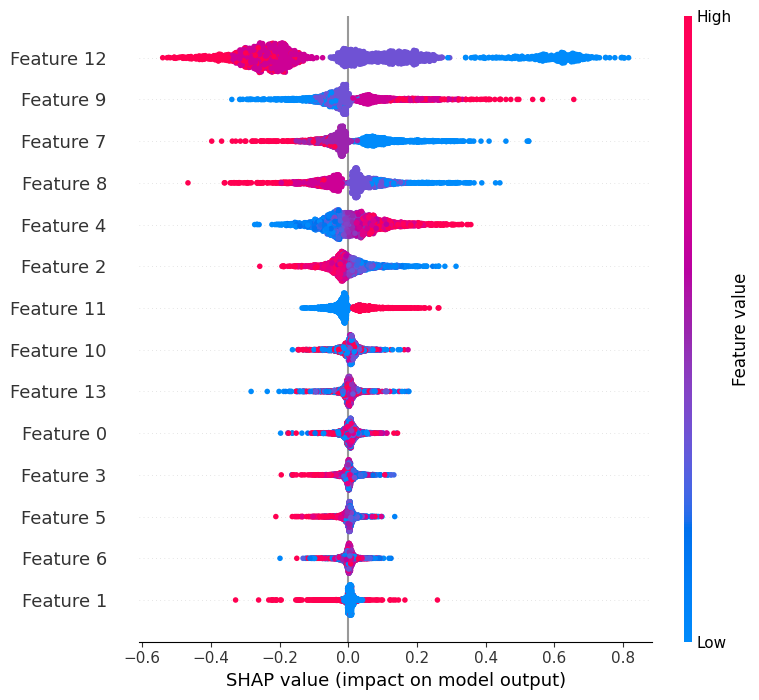

In [ ]:
explainer = shap.Explainer(test_nn_model, masker=shap.maskers.Independent(test_model))
shap_values = explainer.shap_values(test_model)
shap.summary_plot(shap_values, test_model)

In [ ]:
explainer = shap.Explainer(test_nn_model, masker=shap.maskers.Independent(X_train))
shap_values = explainer.shap_values(X_train)
shap.plots.force(explainer.expected_value[1], shap_values[1])

AttributeError: 'PermutationExplainer' object has no attribute 'expected_value'